# Using Gaussian smoothing on the cropped SW Madagascar image

In [86]:
from pathlib import Path
from skimage import io, img_as_float, exposure, filters
from skimage.transform import rescale
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
datapath = Path('../data/')

In [13]:
list(datapath.glob('*.png'))

[PosixPath('../data/madagascar_3b.png')]

In [41]:
image_file = datapath.joinpath('madagascar_3b.tif')
image = io.imread(image_file)

In [42]:
image.dtype, image.min(), image.max(), image.shape

(dtype('uint16'), 0, 10211, (10980, 10980, 3))

In [48]:
image_float = img_as_float(image)
p2, p98 = np.percentile(image_float, (2, 98))
image_rescale = exposure.rescale_intensity(image_float, in_range=(p2, p98))

In [49]:
image_rescale.dtype, image_rescale.min(), image_rescale.max(), image_rescale.shape

(dtype('float64'), 0.0, 1.0, (10980, 10980, 3))

Check out the 'Rescaling intensity values': http://scikit-image.org/docs/dev/user_guide/data_types.html

Taking a crop of SW Madagascar - this is where the Toliara barrier reef is located

Let's smooth the image using a Gaussian convolution

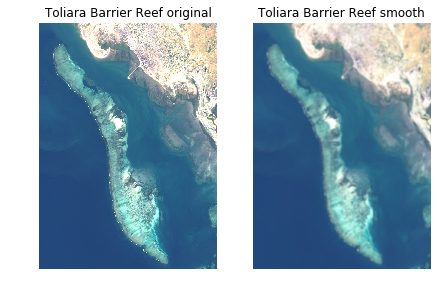

In [108]:
crop_image = image_rescale[8200:10000, 5700:7000]
sigma =  5
smooth_image = filters.gaussian(crop_image, sigma=sigma)

fig, ax = plt.subplots(1, 2, figsize=(7, 5))
for a in ax:
    a.axis('off')
ax[0].imshow(crop_image)
ax[0].set_title('Toliara Barrier Reef original')
ax[1].imshow(smooth_image)
ax[1].set_title('Toliara Barrier Reef smooth');